<a href="https://colab.research.google.com/github/pankajbhatia85/NLP-automatic-Ticketing/blob/main/nlp_automatic_ticketing_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Set your project path
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [ ]:
pip install langid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941187 sha256=e986ef50737a8baeead11f1b7c0840b20ac20722dc695cc0c576518d89fdd13a
  Stored in directory: /root/.cache/pip/wheels/93/95/a9/c292c9dd8cadb8f2359f1670ff198a40d47167b0be3236e1c8
Successfully built langid


# Pre-Processing, Data Visualization and EDA

- Exploring the given Data files
- Understanding the structure of data
- Missing points in data
- Finding inconsistencies in the data
- Visualizing different patterns
- Visualizing different text features
- Dealing with missing values
- Text preprocessing
- Creating word vocabulary from the corpus of report text data
- Creating tokens as required

In [ ]:
import numpy as np    # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re    #removing numbers,punctuations,i.e regular expressions from the doc
from matplotlib.pyplot import plot

from numpy.random import RandomState

import nltk
from nltk.corpus import stopwords    #Stopwords corpus
from nltk.stem import PorterStemmer    # Stemmer

import spacy # fast NLP
import langid # language identification (i.e. what language is this?)
from nltk.classify.textcat import TextCat # language identification from NLTK

from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup   #to remove HTML tags from the doc


from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer    #For Bag of words

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#df = pd.read_csv(project_path + 'input_data.xlsx')
import pandas as pd
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/input_data.xlsx')
df.head()

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
df.shape

(8500, 4)

In [ ]:
df.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7814,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [ ]:
df.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
df = df.rename(columns={"Short description": "short_description", "Description": "description", "Caller": "caller", "Assignment group": "assignment_group"})

In [ ]:
df.head()

,short_description,description,caller,assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
bool=df.isnull().values.any()

# Observation
if bool:
    print('There are missing/null values in the data set')
else:
    print('There are no missing/null values in the data set')
df.isnull().sum()

There are missing/null values in the data set


short_description    8
description          1
caller               0
assignment_group     0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

short_description    0
description          0
caller               0
assignment_group     0
dtype: int64

In [ ]:
df['short_description'].unique()

array(['login issue', 'outlook', 'cant log in to vpn', ...,
       'vip2: windows password reset for tifpdchb pedxruyf',
       'machine nÃ£o estÃ¡ funcionando',
       'an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen. '],
      dtype=object)

In [ ]:
df["short_description_nwords"] = df["short_description"].apply(lambda x: len(str(x).split(" ")))

In [ ]:
df[["short_description","short_description_nwords"]].sort_values(by = "short_description_nwords",ascending = True).head()

,short_description,short_description_nwords
8270,å¯†ç _x0081_æ›´æ”¹å_x0090_Žï¼Œoutlookæ— æ³•ç™»é™†,1
5149,å¼€ä¸_x008d_äº†æœº,1
5147,ç”µè„‘å¼€æœºæ•…éšœ,1
5146,walkmeåŠ è½½æ•…éšœ,1
6227,vvdortddp,1


In [ ]:
df[["short_description","short_description_nwords"]].sort_values(by = "short_description_nwords",ascending = False).head()

,short_description,short_description_nwords
4385,pc set up for new employee -mghlisha.baranwfhr...,41
1076,hello on my order below. i have 5 drop s...,32
2881,"i did a po and it received with no problem, i ...",28
3907,i am not able to log into my vpn. when i am tr...,28
6307,i have created 2 new material numbers but when...,27


In [ ]:
df["short_description_nchars"] = df["short_description"].str.len()
df[["short_description","short_description_nchars"]].sort_values(by = "short_description_nchars",ascending = False).head()

,short_description,short_description_nchars
7147,i cannot receive calls through telephony_softw...,159
3202,erp production order printing issue : connecti...,159
7572,ç­”å¤_x008d_: email address link to delivery n...,157
5257,åˆ é™¤äº†ä¸€ä¸ªexcel æ–‡æ¡£ï¼Œæ–‡æ¡£åœ°å_x009d...,155
394,please assist thrys hsdbdtt in logging into re...,151


In [ ]:
df[["short_description","short_description_nchars"]].sort_values(by = "short_description_nchars",ascending = True).head()

,short_description,short_description_nchars
1860,s,1
3529,PR,2
5547,plm,3
4614,vpn,3
5012,hsh,3


In [ ]:
df['short_description'].apply(langid.classify)

0         (en, 3.656414031982422)
1         (en, 9.061840057373047)
2       (en, -35.080052852630615)
3        (en, -21.68566083908081)
4         (da, -10.9104642868042)
                  ...            
8495     (en, -50.66954183578491)
8496     (en, -26.47694492340088)
8497     (en, -46.64426279067993)
8498      (pt, -78.7758240699768)
8499     (de, -232.7365322113037)
Name: short_description, Length: 8491, dtype: object

In [ ]:
# get the language id for each text
ids_langid = df['short_description'].apply(langid.classify)

# get just the language label
langs = ids_langid.apply(lambda tuple: tuple[0])

# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(langs.unique()))

# percent of the total dataset in English
print("Percent of data in English (estimated):")
print((sum(langs=="en")/len(langs))*100)

Number of tagged languages (estimated):
54
Percent of data in English (estimated):
78.89530090684254


<Axes: >

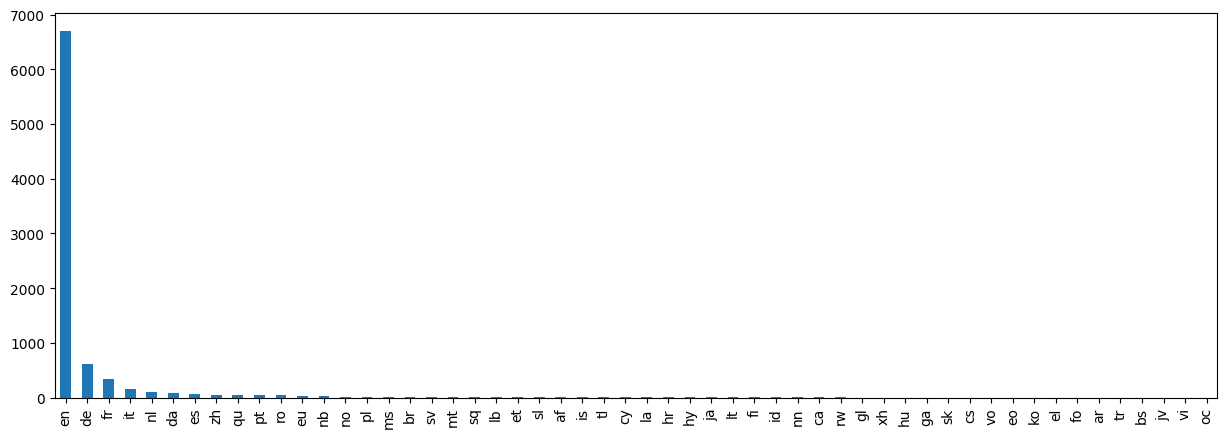

In [ ]:
# convert our list of languages to a dataframe
langs_df = pd.DataFrame(langs)
langs_df

# count the number of times we see each language
langs_count = langs_df['short_description'].value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
langs_count.plot.bar(figsize=(15,5), fontsize=10)

In [ ]:
langs_df

,short_description
0,en
1,en
2,en
3,en
4,da
...,...
8495,en
8496,en
8497,en
8498,pt


In [ ]:
df['different languages']=langs_df

In [ ]:
print("Languages with more than 100 short description in our dataset:")
print(langs_count[langs_count > 100])

print("")

print("Percent of our dataset in these languages:")
print((sum(langs_count[langs_count > 100])/len(langs)) * 100)

Languages with more than 100 short description in our dataset:
en    6699
de     609
fr     332
it     149
nl     103
Name: short_description, dtype: int64

Percent of our dataset in these languages:
92.94547167589212


In [ ]:
# get a list of description labelled "de" by langid
German_query = df['short_description'][langs == "de"]

# load a German-language Spacy model
from spacy.lang.de import German
nlp_de = German(path=None)


# apply the German language model
doc_de = nlp_de(' '.join(German_query))

# print the longest tokens
sorted(doc_de, key=len, reverse=True)[0:5]

[\\HostName_625\departments\ehs_arbeitsmedizin,
 \\eagcldaten\aese\leitung\csd_emealeitung,
 bkbackup_tool_HostName_770_prod_inc,
 au-accounts.receivable@company.com,
 production_order_interface_app]

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

to 2159
in 1760
at 1000
not 981
job 978
00 960
job_scheduler 959
on 935
password 879
erp 866
2016 865
is 861
failed 828
for 743
the 714
unable 713
reset 691
account 501
10 489
issue 482


<Axes: xlabel='Short Description Top_Words'>

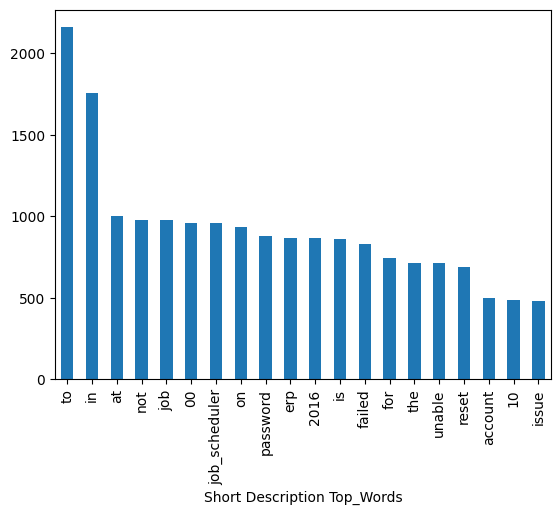

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['short_description'].values.astype('U'), 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Short Description Top_Words' , 'count'])
df2=df1.groupby('Short Description Top_Words').sum()['count'].sort_values(ascending=False)
df2.plot.bar()

to 6580
the 6324
com 3683
in 3421
from 3311
is 2696
company 2416
and 2393
received 2368
no 2238
gmail 2159
on 2029
not 1960
please 1950
for 1905
yes 1792
of 1609
na 1608
it 1584
at 1503


<Axes: xlabel='Description Top_Words'>

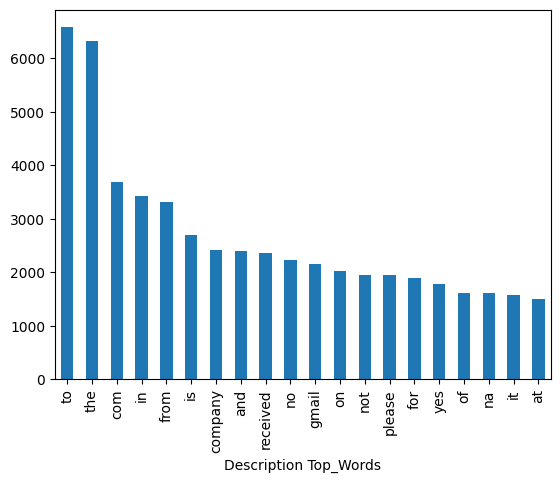

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['description'].values.astype('U'), 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Description Top_Words' , 'count'])
df2=df1.groupby('Description Top_Words').sum()['count'].sort_values(ascending=False)
df2.plot.bar()

In [ ]:
df['assignment_group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

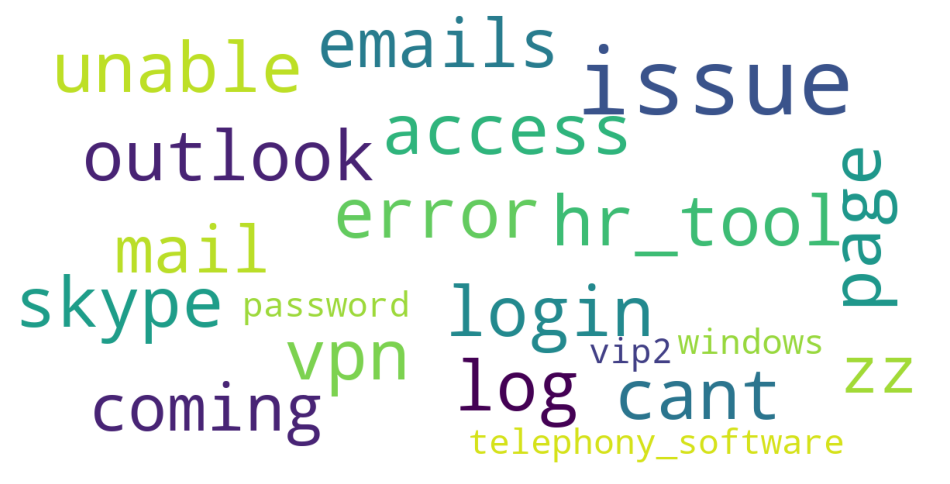

In [ ]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=20,
        max_font_size=40,
        scale=3,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df['short_description'])

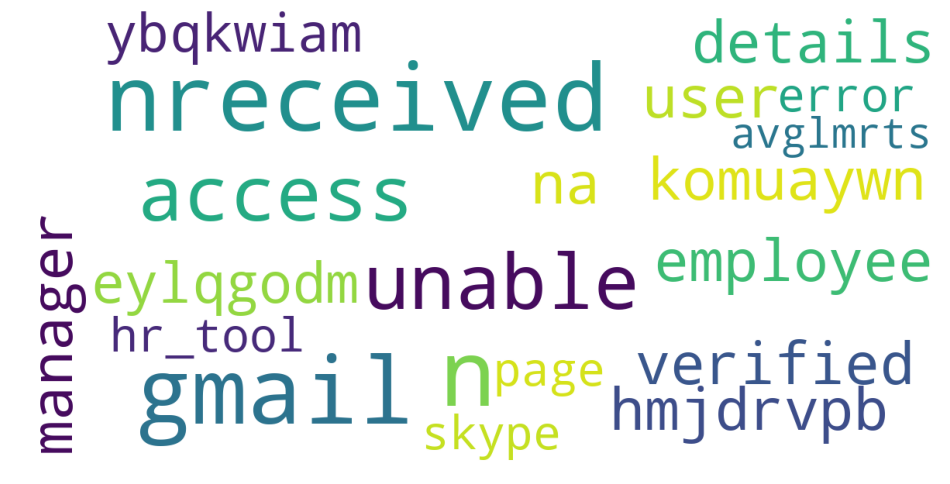

In [ ]:
show_wordcloud(df['description'])

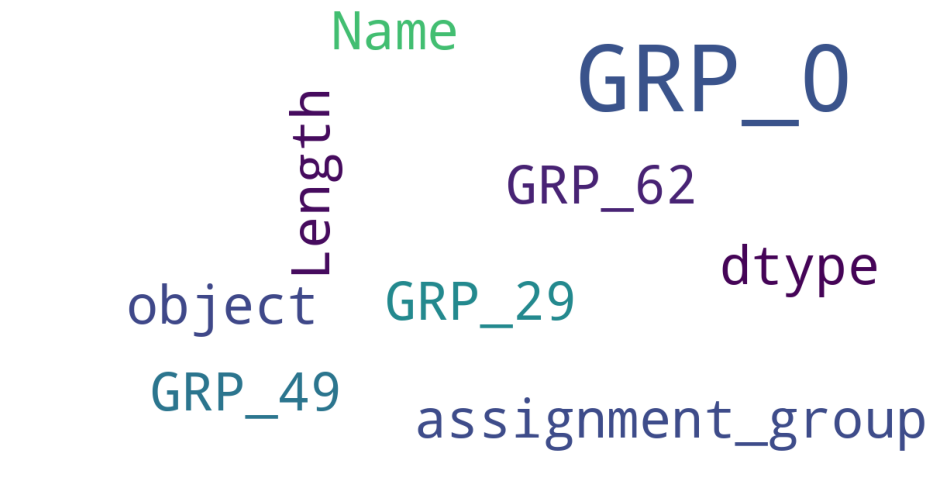

In [ ]:
show_wordcloud(df['assignment_group'])

In [ ]:
#df.groupby('assignment_group').apply(lambda x: show_wordcloud(x.description, title= f"{x.name}"))

In [ ]:
#df.groupby('assignment_group').apply(lambda x: show_wordcloud(x.short_description, title= f"{x.name}"))

Text(0.5, 1.0, 'Distribution of Tickets')

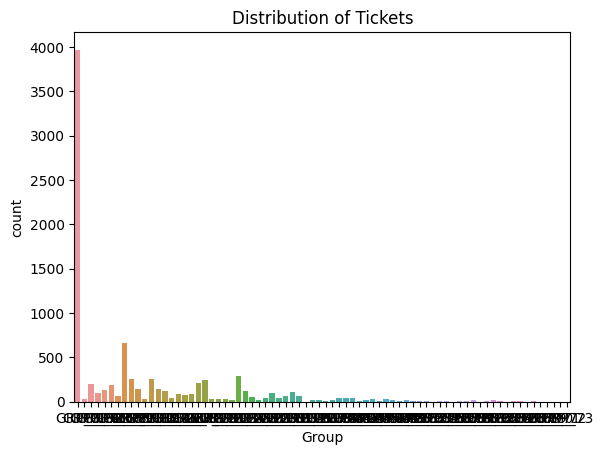

In [ ]:
sns.countplot(df,x='assignment_group')
plt.xlabel('Group')
plt.title('Distribution of Tickets')

In [ ]:
df=df.groupby('assignment_group').filter(lambda x : len(x)>100)

In [ ]:
df.describe() # after removing groups with less than 100 tickcets

,short_description_nwords,short_description_nchars
count,7022.000000,7022.000000
mean,7.174024,45.631729
std,4.201744,26.163934
min,1.000000,1.000000
25%,4.000000,25.000000
50%,6.000000,39.000000
75%,10.000000,62.000000
max,41.000000,159.000000


In [ ]:
df.groupby('assignment_group').count()

,short_description,description,caller,short_description_nwords,short_description_nchars,different languages
assignment_group,,,,,,
GRP_0,3968,3968,3968,3968,3968,3968
GRP_10,140,140,140,140,140,140
GRP_12,257,257,257,257,257,257
GRP_13,145,145,145,145,145,145
GRP_14,118,118,118,118,118,118
GRP_19,215,215,215,215,215,215
GRP_2,241,241,241,241,241,241
GRP_24,289,289,289,289,289,289
GRP_25,116,116,116,116,116,116


In [ ]:
df['assignment_group'].value_counts(normalize=True)

GRP_0     0.565081
GRP_8     0.094133
GRP_24    0.041156
GRP_12    0.036599
GRP_9     0.035887
GRP_2     0.034321
GRP_19    0.030618
GRP_3     0.028482
GRP_6     0.026203
GRP_13    0.020649
GRP_10    0.019937
GRP_5     0.018371
GRP_14    0.016804
GRP_25    0.016520
GRP_33    0.015238
Name: assignment_group, dtype: float64

In [ ]:
df.groupby('caller').count()

,short_description,description,assignment_group,short_description_nwords,short_description_nchars,different languages
caller,,,,,,
DEsowkrH sciejzNE,1,1,1,1,1,1
HdOuWxAt qfKdlJMx,1,1,1,1,1,1
ZkBogxib QsEJzdZO,140,140,140,140,140,140
abtknpew ifcekjdb,1,1,1,1,1,1
abyfsqod baezguci,1,1,1,1,1,1
...,...,...,...,...,...,...
zylaexnv pvkzbduh,3,3,3,3,3,3
zylwdbig wdkbztjp,1,1,1,1,1,1
zymdwqsi jzvbthil,1,1,1,1,1,1


In [ ]:
df['description'] = df['description'].str.lower()
df['short_description'] = df['short_description'].str.lower()
df['caller'] = df['caller'].str.lower()

In [ ]:
df['short_description'] = df['short_description'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df['description'] = df['description'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [ ]:
#for index, row in df['short_description'].iteritems():
 #   lang = detect(row) #detecting each row
  #  df.loc[index, 'Languagereveiw'] = lang

In [ ]:
df.head()

,short_description,description,caller,assignment_group,short_description_nwords,short_description_nchars,different languages
0,login issue,verified user detailsemployee manager name\nc...,spxjnwir pjlcoqds,GRP_0,2,11,en
1,outlook,\n\nreceived from hmjdrvpbkomuaywngmailcom\n\n...,hmjdrvpb komuaywn,GRP_0,1,7,en
2,cant log in to vpn,\n\nreceived from eylqgodmybqkwiamgmailcom\n\n...,eylqgodm ybqkwiam,GRP_0,5,18,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,5,29,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,3,12,da


## Pre-processing Bag of words

In [ ]:
## Importing stop words from nltk.corpus
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# most common stopwords used in english language

print(stopwords.words("english"))
stop = stopwords.words("english")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
words = df['short_description']
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['login issue', 'outlook', 'cant log in to vpn', 'unable to access hr_tool page', 'skype error ', 'unable to log in to engineering tool and skype', 'ticket_no1550391 employment status  new nonemployee [enter users name]', 'unable to disable add ins on outlook', 'ticket update on inplant_874773', 'engineering tool says not connected and unable to submit reports', 'hr_tool site not loading page correctly', 'unable to login to hr_tool to sgxqsuojr xwbesorf cards', 'user wants to reset the password', 'unable to open payslips ', 'ticket update on inplant_874743', 'unable to login to company vpn', 'when undocking pc  screen will not come back', 'erp sid_34 account locked', 'unable to sign into vpn', 'unable to check payslips', 'vpn issue', 'unable to connect to vpn', 'user called for vendor phone number', 'vpn not working', 'erp sid_37 password reset ', 'unable to login to hr_tool to check payslips', 'account locked out', 'unable to login to hr_tool', 'unable to log in to erp sid_34 ', 'pass

In [ ]:
df["short_description_nstopwords"] = df["short_description"].apply(lambda word: len([x for x in word.split(" ") if x in stop]))
df[["short_description","short_description_nstopwords"]].sort_values(by = "short_description_nstopwords",ascending = False).head()

,short_description,short_description_nstopwords
3907,i am not able to log into my vpn when i am try...,17
3506,i am trying to find an expense report to appro...,16
2541,a user was able to add a zj partner in sid_34 ...,15
3054,my outlook will not work on my computer this w...,14
7156,our server is getting full again i have found ...,13


Number of numerics

In [ ]:
df["short_description_ndigits"] = df["short_description"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

df[["short_description","short_description_ndigits"]].sort_values(by = "short_description_ndigits",ascending = False).head()

,short_description,short_description_ndigits
1076,hello on my order below i have 5 drop sh...,6
6287,i am stuck has 3 lines lines 40 and 50 h...,5
6263,circuit outage india telecom_vendor_1 40 20 m...,4
4019,vip 2 access to company guest from 19 septembe...,4
2722,info type 0017 is missing to personal numbers ...,4


Number of upper case words

In [ ]:
df["short_description_nupper"] = df["short_description"].apply((lambda word: len([x for x in word.split() if x.isupper()])))
df[["short_description","short_description_nupper"]].sort_values(by = "short_description_nupper",ascending = False).head()

,short_description,short_description_nupper
0,login issue,0
5622,time format needs to be changed to 24 hours,0
5640,bad monitor lbdw7402361,0
5639,soflex dnc is not working,0
5638,trying to sign on to purchasing system but the...,0


## Basic Pre-processing

### 2.1 Lower case

The first pre-processing step which we will do is transform our short description into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [ ]:
df["short_description"] = df["short_description"].apply(lambda x: x.lower())
df["short_description"].head()

0                      login issue
1                          outlook
2               cant log in to vpn
3    unable to access hr_tool page
4                     skype error 
Name: short_description, dtype: object

### 2.2 Removing Punctuation

The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [ ]:
df["short_description"] = df["short_description"].str.replace("[^\w\s]","")
df["short_description"].tail()

<ipython-input-54-97bcc895b26d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["short_description"] = df["short_description"].str.replace("[^\w\s]","")


8492                   hr_tool etime option not visitble 
8493               erp fi   ob09 two accounts to be added
8494    tablet needs reimaged due to multiple issues w...
8496                             telephony_software issue
8497    vip2 windows password reset for tifpdchb pedxruyf
Name: short_description, dtype: object

### 2.3 Removal of Stop Words

In [ ]:
df["short_description"] = df["short_description"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

### 2.4 Lemmatization

Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [ ]:
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df["short_description"] = df["short_description"].apply(lambda x: " ".join([Word(myword).lemmatize() for myword in x.split()])  )

In [ ]:
df["short_description"].head()

0                   login issue
1                       outlook
2                  cant log vpn
3    unable access hr_tool page
4                   skype error
Name: short_description, dtype: object

In [ ]:
### Most frequent words in short description
Short_description_most_freq_words = pd.Series(" ".join(df["short_description"]).split()).value_counts()
Short_description_most_freq_words.head(20)

job              933
job_scheduler    911
failed           791
password         786
erp              768
unable           637
reset            509
account          488
issue            469
outlook          364
access           338
locked           287
login            286
sid_34           280
update           239
user             233
working          232
error            228
skype            196
vpn              195
dtype: int64

In [ ]:
### Least frequent words in short description
short_description_least_freq_words =  pd.Series(" ".join(df["short_description"]).split()).value_counts().sort_values(ascending = True)
short_description_least_freq_words.head(10)

wphqnxly      1
jdamieul      1
fandyhgg      1
102900        1
silvgtyar1    1
schmidt       1
075900        1
nk_prod       1
welcome       1
vvspecmfrt    1
dtype: int64

### 2.6 Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from textblob import TextBlob
TextBlob(df["short_description"][1]).words

WordList(['outlook'])

In [ ]:
from nltk import word_tokenize,sent_tokenize

In [ ]:
df["short_description_tokens"] =  df["short_description"].apply(lambda x: TextBlob(x).words)

In [ ]:
df["short_description_tokens"].head(10)


0                                        [login, issue]
1                                             [outlook]
2                                      [cant, log, vpn]
3                       [unable, access, hr_tool, page]
4                                        [skype, error]
5               [unable, log, engineering, tool, skype]
7     [ticket_no1550391, employment, status, new, no...
8                   [unable, disable, add, in, outlook]
9                      [ticket, update, inplant_874773]
10    [engineering, tool, say, connected, unable, su...
Name: short_description_tokens, dtype: object

In [ ]:
df["Short description_tn"]=df["short_description"].apply(lambda x: word_tokenize(x))


## Extract Featuring - Advanced Text Analytics

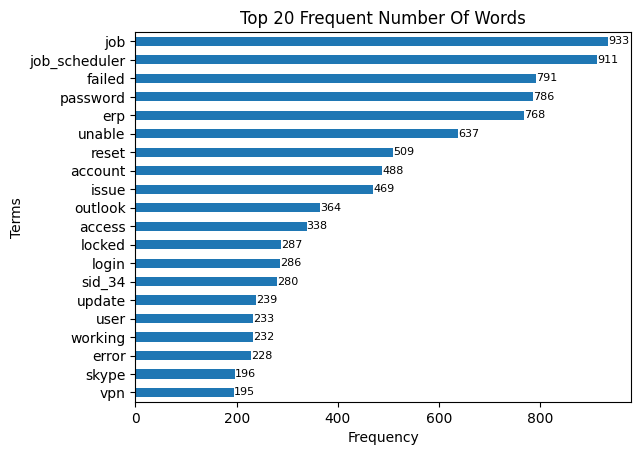

In [ ]:
### Analyzing top 20 frequent words
import matplotlib.pyplot as plt

sd_freq_plot = Short_description_most_freq_words.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Number Of Words")

plt.style.use("ggplot")
sd_freq_plot.set_xlabel("Frequency")
sd_freq_plot.set_ylabel("Terms")

totals = []
for i in sd_freq_plot.patches:
    totals.append(i.get_width())

for i in sd_freq_plot.patches:
    sd_freq_plot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),fontsize = 8,color= 'black')

## N-Grams

In [ ]:
bigrams = TextBlob(" ".join(df["short_description"])).ngrams(2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df["short_description"])
frequencies = sum(sparse_matrix).toarray()[0]
bi_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])

In [ ]:
bi_grams_df.sort_values(by = "frequency",ascending=False).head(20)

,frequency
failed job_scheduler,770
password reset,344
erp sid_34,238
account locked,196
ticket update,151
job job_scheduler,138
abended job,136
unable login,114
probleme mit,102
reset password,96


### Bi Grams Data Visualization

<Axes: title={'center': 'Top 20 Frequent Bi Grams'}, ylabel='Terms'>

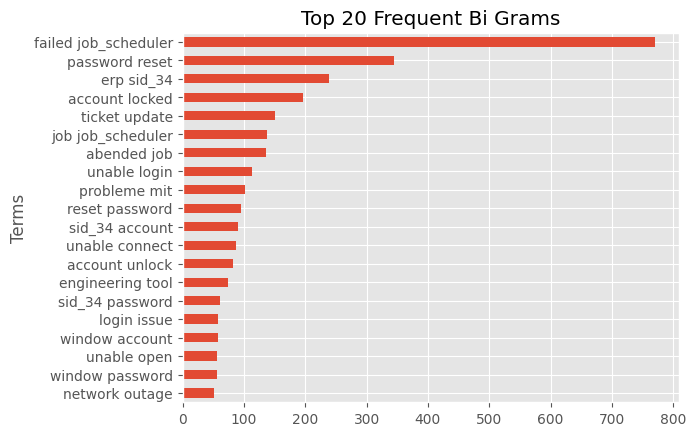

In [ ]:
### Analyzing top 20 frequent BI Gram words

plt.style.use("ggplot")
plt.xlabel("Frequency",)
plt.ylabel("Terms")
top20_bigrams = bi_grams_df["frequency"].sort_values(ascending = False).head(20)

top20_bigrams.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Bi Grams")

In [ ]:
df["short_description"] = df["short_description"].str.replace("password reset","reset password")

In [ ]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df["short_description"])
frequencies = sum(sparse_matrix).toarray()[0]
bi_grams_issue_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])

In [ ]:
bi_grams_issue_df[bi_grams_issue_df.index.str.contains("issue")].sort_values(by = "frequency",ascending=False).head(10)

,frequency
login issue,58
access issue,33
outlook issue,25
issue information,14
problem issue,13
skype issue,11
vpn issue,10
printer issue,9
audio issue,8
lock issue,8


### Bi Grams Data Visualization-- words containing issue

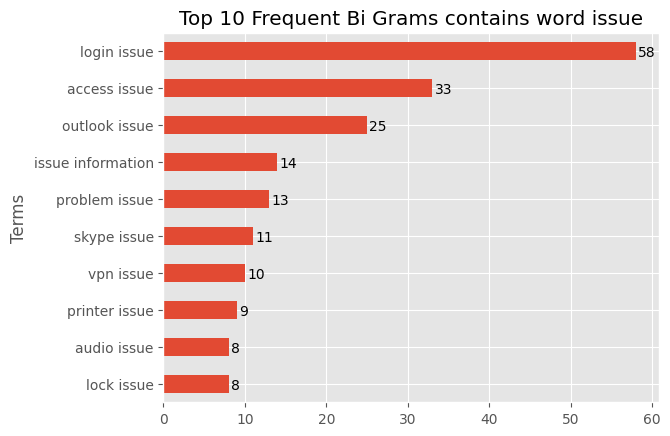

In [ ]:
### Analyzing top 10 frequent BI Gram words- word containing issue

plt.style.use("ggplot")
plt.xlabel("Frequency")
plt.ylabel("Terms")
plt.title("Top 10 Frequent Bi Grams contains word ""issue""")
top20_bigrams_issue = bi_grams_issue_df["frequency"].sort_values(ascending = False)

top20_bigrams_issue_plot = top20_bigrams_issue[top20_bigrams_issue.index.str.contains("issue")].head(10).sort_values(ascending = True).plot(kind="barh")

totals = []
for i in top20_bigrams_issue_plot.patches:
    totals.append(i.get_width())

for i in top20_bigrams_issue_plot.patches:
    top20_bigrams_issue_plot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),fontsize = 10,color= 'black')

### Tri-Gram Frequency for Text - "Short Description"

In [ ]:
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df["short_description"])

frequencies = sum(sparse_matrix).toarray()[0]
tri_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])

In [ ]:
tri_grams_df.sort_values(by = "frequency",ascending=False).head(20)

,frequency
abended job job_scheduler,136
erp sid_34 account,90
sid_34 reset password,50
erp sid_34 reset,49
window account locked,38
sid_34 account unlock,37
sid_34 account locked,37
reset password request,36
mobile device activation,36
window reset password,35


### Tri Grams Data Visualization

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'abended job job_scheduler'),
  Text(1, 0, 'erp sid_34 account'),
  Text(2, 0, 'sid_34 reset password'),
  Text(3, 0, 'erp sid_34 reset'),
  Text(4, 0, 'window account locked')])

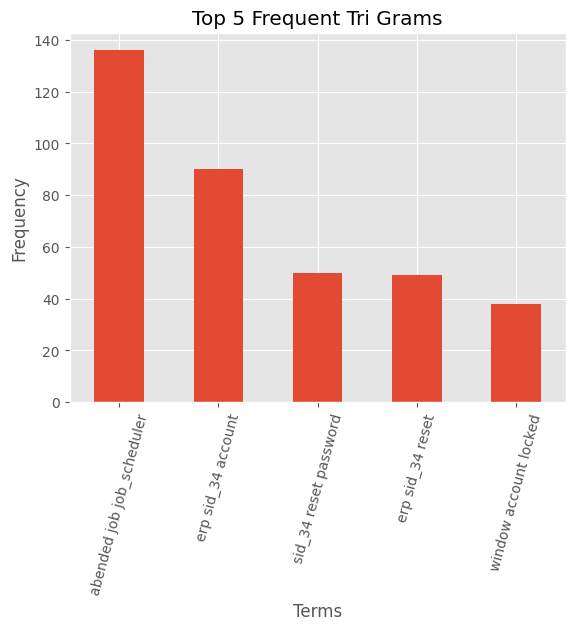

In [ ]:
### Analyzing top 5 frequent Tri Gram words

plt.style.use("ggplot")
plt.xlabel("Terms",)
plt.ylabel("Frequency")
trigrams_short_description = tri_grams_df["frequency"].sort_values(ascending = False)
top20_trigrams = tri_grams_df["frequency"].sort_values(ascending = False).head(20)

top5_trigrams_plot =  top20_trigrams.head(5).sort_values(ascending = False).plot(kind="bar",title = "Top 5 Frequent Tri Grams")
top5_trigrams_plot
plt.xticks(rotation=75)

## Model preprocessing and Spliting Data

In [ ]:
df_en= df[df['different languages']=='en']

### Term Frequency Technique

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer

X = df_en.short_description

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_en.assignment_group)
Y = multilabel_binarizer.transform(df_en.assignment_group)

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_en.short_description)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)



In [ ]:
# Create a dictionary to get label counts
label_counts = dict()

for labels in df_en.assignment_group.values:
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

In [ ]:
from collections import Counter
target = df['assignment_group']
counter = Counter(label_counts)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=G, Count=5580, Percentage=79.465%
Class=R, Count=5580, Percentage=79.465%
Class=P, Count=5580, Percentage=79.465%
Class=_, Count=5580, Percentage=79.465%
Class=0, Count=3202, Percentage=45.600%
Class=3, Count=363, Percentage=5.169%
Class=5, Count=210, Percentage=2.991%
Class=6, Count=160, Percentage=2.279%
Class=8, Count=653, Percentage=9.299%
Class=9, Count=418, Percentage=5.953%
Class=1, Count=748, Percentage=10.652%
Class=2, Count=578, Percentage=8.231%
Class=4, Count=178, Percentage=2.535%


### Random oversampling for tfidf vectorised data

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install scikit-multilearn==0.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.7 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import LabelPowerset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=9000)
lp = LabelPowerset()
Yt = lp.transform(Y)

X_tfidf_resampled, Y_tfidf_resampled = ros.fit_resample(X_tfidf,Yt)
Ytps=Y_tfidf_resampled
Y_tfidf_resampled = lp.inverse_transform(Y_tfidf_resampled)

In [ ]:
print(X_tfidf_resampled.shape[0] - X.shape[0], 'new random picked points')

37484 new random picked points


In [ ]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf_resampled, Ytps, test_size=0.2, random_state=9000)

### Testing tfidf data on some sample models

Models considered in this step are
- Multinomial Naive Bayes
- SDC Classifier
- Logistic Regression
- One vs Rest classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss

def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/float(len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test_tfidf)))
    print("Hamming score: {}".format(hamming_score(y_pred, y_test_tfidf)))
    print("---")

In [ ]:
nb_clf = MultinomialNB()
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=6, tol=None)
lr = LogisticRegression()
mn = MultinomialNB()

for classifier in [nb_clf, sgd, lr, mn]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_train_tfidf, y_train_tfidf)
    y_pred = clf.predict(x_test_tfidf)
    print_score(y_pred, classifier)

Clf:  MultinomialNB
Hamming loss: 0.06745617090444676
Hamming score: 0.9664460698943458
---
Clf:  SGDClassifier
Hamming loss: 0.10217113665389528
Hamming score: 0.9591315453384419
---
Clf:  LogisticRegression
Hamming loss: 0.03924300476024614
Hamming score: 0.9738766980146291
---
Clf:  MultinomialNB
Hamming loss: 0.06745617090444676
Hamming score: 0.9664460698943458
---


### SMOTE on tfidf parameters

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2)
Ysm=lp.transform(y_train_tfidf)
X_sm, y_sm = smote.fit_resample(x_train_tfidf, Ysm)
y_sm=lp.inverse_transform(y_sm)

### Creating Model comparision table

In [ ]:
columns=['LSTM+GloveEmbedding','DNN', 'CNN', 'NaiveB','LogisticRegression', 'RandomForest','KNN', 'SVM','K-fold', 'Gaussian NB','Adaboost', 'XGBoost', 'GradientBoost']
results = pd.DataFrame(columns = columns)
results

,LSTM+GloveEmbedding,DNN,CNN,NaiveB,LogisticRegression,RandomForest,KNN,SVM,K-fold,Gaussian NB,Adaboost,XGBoost,GradientBoost


# Modelling

## Glove Embedding with lstm

In [ ]:
Y = pd.get_dummies(df_en['assignment_group']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (5580, 15)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df_en['short_description'],Y,test_size=0.15)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight='balanced',classes= np.unique(X_train),y=X_train)

print("Class Weights:",class_weights)

Class Weights: [0.57897949 1.15795898 1.15795898 ... 1.15795898 1.15795898 1.15795898]


In [ ]:
# Set Different Parameters for the model.
max_features = 10000
maxlen = max([len(text) for text in df['short_description']])
embedding_size = 200

In [ ]:
# Apply Keras Tokenizer of short_description column of your data
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['short_description'].values)

In [ ]:
X = tokenizer.texts_to_sequences(df_en['short_description'])
X = pad_sequences(X, maxlen = maxlen)
y = pd.get_dummies(df_en['assignment_group']).values
print('Shape of label tensor:', y.shape)

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Shape of label tensor: (5580, 15)
Number of Samples: 5580
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15 11]
Number of Labels:  5580
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Get the Vocabulary size
num_words=len(tokenizer.word_index)
print (num_words)

6953


In [ ]:
glove_file = "/content/drive/My Drive/Colab Notebooks/glove.6B.zip"

In [ ]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [ ]:
# Get the Word Embeddings using Embedding file as given below
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
     #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
     #print(embd)
    embeddings[word] = embd

In [ ]:
# Create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras import preprocessing

max_words = 1000
max_len = 150


In [ ]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.utils import pad_sequences
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = keras.utils.pad_sequences(sequences,maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=sequences_matrix.shape[1]))
#model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(15, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

In [ ]:
history = model.fit(sequences_matrix, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
67/67 [==============================] - 53s 711ms/step - loss: 1.6903 - accuracy: 0.5883 - val_loss: 1.2677 - val_accuracy: 0.6632
Epoch 2/5
67/67 [==============================] - 51s 763ms/step - loss: 1.1827 - accuracy: 0.6664 - val_loss: 1.0888 - val_accuracy: 0.6800
Epoch 3/5
67/67 [==============================] - 50s 750ms/step - loss: 1.0174 - accuracy: 0.6968 - val_loss: 0.9987 - val_accuracy: 0.6947
Epoch 4/5
67/67 [==============================] - 49s 733ms/step - loss: 0.8665 - accuracy: 0.7481 - val_loss: 0.9258 - val_accuracy: 0.7368
Epoch 5/5
67/67 [==============================] - 49s 740ms/step - loss: 0.7204 - accuracy: 0.7875 - val_loss: 0.8322 - val_accuracy: 0.7642


In [ ]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.utils import pad_sequences
tok.fit_on_texts(X_test)
sequences1 = tok.texts_to_sequences(X_test)
sequences_matrix1 = keras.utils.pad_sequences(sequences1,maxlen=max_len)

In [ ]:
accr = model.evaluate(sequences_matrix1,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

27/27 [==============================] - 2s 66ms/step - loss: 1.4936 - accuracy: 0.5854
Test set
  Loss: 1.494
  Accuracy: 0.585


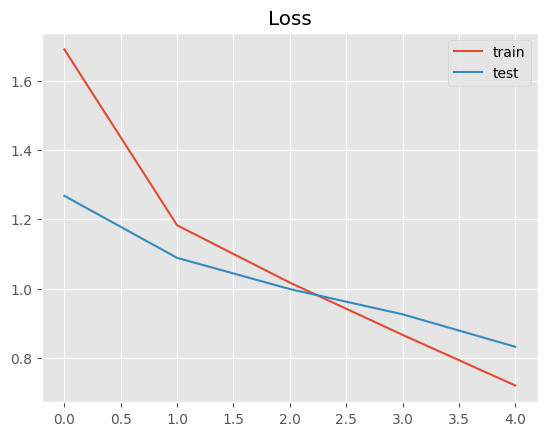

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

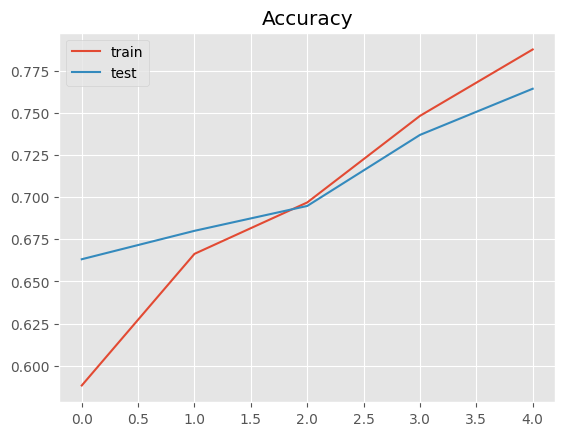

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
results.loc[4,'LSTM+GloveEmbedding'] = accr[1]
results

,LSTM+GloveEmbedding,DNN,CNN,NaiveB,LogisticRegression,RandomForest,KNN,SVM,K-fold,Gaussian NB,Adaboost,XGBoost,GradientBoost
4,0.585424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

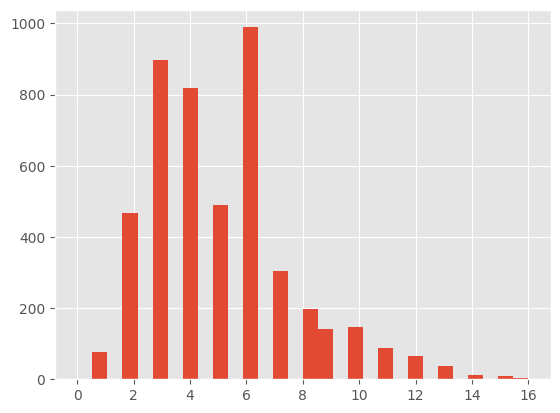

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in X_train]

pd.Series(seq_len).hist(bins = 30)

## DNN

In [ ]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(df_en['short_description'])
sequences = tokenizer.texts_to_sequences(df_en['short_description'])
x = keras.utils.pad_sequences(sequences, maxlen=200)
xdnn=lp.transform(x)


In [ ]:
Y = pd.get_dummies(df_en["assignment_group"]).values
Ydnn=lp.transform(Y)
print('Shape of label tensor:', Y.shape)
print('Shape of label tensor:', Ydnn.shape)

Shape of label tensor: (5580, 15)
Shape of label tensor: (5580,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=4)
print(X_test.shape,y_test.shape)
print(X_train,y_train)

(1674, 200) (1674, 15)
[[   0    0    0 ...    5   44  184]
 [   0    0    0 ...    2  262  148]
 [   0    0    0 ...  112 1375  154]
 ...
 [   0    0    0 ...    2  378 1095]
 [   0    0    0 ...   94  136   58]
 [   0    0    0 ... 1116  430    4]] [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
num_classes = 15
max_words = len(tokenizer.word_index) + 1
maxlen = 200

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf

model = Sequential()
model.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.2))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer=Adam(0.015), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
callbacks = [
    ReduceLROnPlateau(),
    #EarlyStopping(patience=10),
    ModelCheckpoint(filepath='model-simple.h5', save_best_only=True)
]


history = model.fit(X_train, y_train,
                    class_weight=class_weights,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    )

ValueError: ignored

In [ ]:
cnn_model = model
metrics = cnn_model.evaluate(X_test, y_test)
print("{}: {}".format(cnn_model.metrics_names[1], metrics[1]))

In [ ]:
results.loc[4,'DNN'] = metrics[1]
results

## CNN

In [ ]:
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

filter_length = 300

model = Sequential()
model.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.5))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = model.fit(X_train, y_train,
                    class_weight=class_weights,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)


In [ ]:
cnn_model = model
metrics = cnn_model.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

In [ ]:
results.loc[4,'CNN'] = metrics[1]
results

## Naive Bayes Multinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

X_train, X_test, y_train, y_test = train_test_split(df['short_description'],  df['assignment_group'], test_size=0.2, random_state=10)



nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
results.loc[4,'NaiveB'] = accuracy_score(y_pred, y_test)
results

## Bag of Words with Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_en['short_description'], df_en['assignment_group'], test_size=0.20, random_state=42)

In [ ]:
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
#Have a look at some feature names
vectorizer.get_feature_names_out()[:5]

In [ ]:
# Create a dictionary to get label counts
label_counts = dict()

for labels in df_en.assignment_group.values:
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

In [ ]:
#View term-document matrix
X_train_bow.toarray()

In [ ]:
label_counts

In [ ]:
# Multi label binarizer
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(classes=sorted(label_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)

In [ ]:
# Classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf = OneVsRestClassifier(clf)

In [ ]:
#Fit the classifier
clf.fit(X_train_bow, y_train)

In [ ]:
# Make predictions
predicted_labels = clf.predict(X_test_bow)
predicted_scores = clf.decision_function(X_test_bow)

In [ ]:
pred_inversed = mlb.inverse_transform(predicted_labels)
y_test_inversed = mlb.inverse_transform(y_test)

In [ ]:
#Calculate accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(y_val, predicted):
    print('Accuracy score: ', accuracy_score(y_val, predicted))
    print('F1 score: ', f1_score(y_val, predicted, average='micro'))
    print('Average precision score: ', average_precision_score(y_val, predicted, average='micro'))
    print('Average recall score: ', recall_score(y_val, predicted, average='micro'))

In [ ]:
print('Bag-of-words')
print_evaluation_scores(y_test, predicted_labels)

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [ ]:
n_classes = y_train.shape[1]

In [ ]:
lw=2

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predicted_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predicted_labels.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

#plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

In [ ]:
results.loc[4,'LogisticRegression'] = accuracy_score(y_test, predicted_labels)
results


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_en['short_description'], df_en['assignment_group'], test_size=0.20, random_state=42)

In [ ]:
nb1 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
nb1.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb1.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
results.loc[4,'RandomForest'] = accuracy_score(y_pred, y_test)
results

## KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_en['short_description'], df_en['assignment_group'], test_size=0.20, random_state=42)

In [ ]:
from sklearn.multioutput import MultiOutputClassifier

from sklearn.neighbors import KNeighborsClassifier
knn = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', KNeighborsClassifier()),
              ])
knn.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
results.loc[4,'KNN'] = accuracy_score(y_pred, y_test)
results

## SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_en['short_description'], df_en['assignment_group'], test_size=0.20, random_state=42)

In [ ]:
from sklearn.svm import LinearSVC

svc = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LinearSVC()),
              ])
svc.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
results.loc[4,'SVM'] = accuracy_score(y_pred, y_test)
results

## K fold cross validation

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = df.short_description
Y = df.assignment_group
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, random_state=11,shuffle=True)
resultsKFold = cross_val_score(svc, X_train , Y_train, cv=kfold)

In [ ]:
print(resultsKFold)
print("Accuracy: %.3f%% (%.3f%%)" % (resultsKFold.mean()*100.0, resultsKFold.std()*100.0))

In [ ]:
results.loc[4,'K-fold'] = accuracy_score(y_pred, y_test)
results

## Gaussian NB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_en['short_description'], df_en['assignment_group'], test_size=0.20, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', GaussianNB()),
              ])
svc.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
results.loc[4,'Gaussian NB'] = accuracy_score(y_pred, y_test)
results

## Adaboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_en['short_description'], df_en['assignment_group'], test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', AdaBoostClassifier()),
              ])
abcl = abcl.fit(X_train, y_train)


In [ ]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

print(classification_report(y_test, y_predict))


In [ ]:
results.loc[4,'Adaboost'] = accuracy_score(y_pred, y_test)
results

## XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(df_en['short_description'], df_en['assignment_group'], test_size=0.20, random_state=42)
y_train = le.fit_transform(y_train)
y_test= le.fit_transform(y_test)
print(y_train)


In [ ]:
from xgboost import XGBClassifier
xgb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', XGBClassifier()),
              ])
xgb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = xgb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
results.loc[4,'XGBoost'] = accuracy_score(y_pred, y_test)
results

## Gradient Boost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_en['short_description'], df_en['assignment_group'], test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', GradientBoostingClassifier(n_estimators = 50,random_state=1)),
              ])
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
results.loc[4,'GradientBoost'] = accuracy_score(y_pred, y_test)
results

# Display Results

In [ ]:
def highlight_max(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),

                            index=data.index, columns=data.columns)

In [ ]:
def highlight_min(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

In [ ]:
results.style.apply(highlight_min, color='red', axis=None).apply(highlight_max, color='lightgreen', axis=None)

In [ ]:
t = results.copy()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

#cm = sns.light_palette("green", as_cmap=True)
cm = LinearSegmentedColormap.from_list(
    name='test',
    #colors=['red','white','green','white','red']
    colors=['tomato','orange','white','lightgreen','green']
)

t = results.apply(pd.to_numeric).style.background_gradient(cmap=cm)
t